In [2]:
# Data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Scikit-learn model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# For hyperparameter optimization
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv(r"C:\Users\seshu\Desktop\ml00009\heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


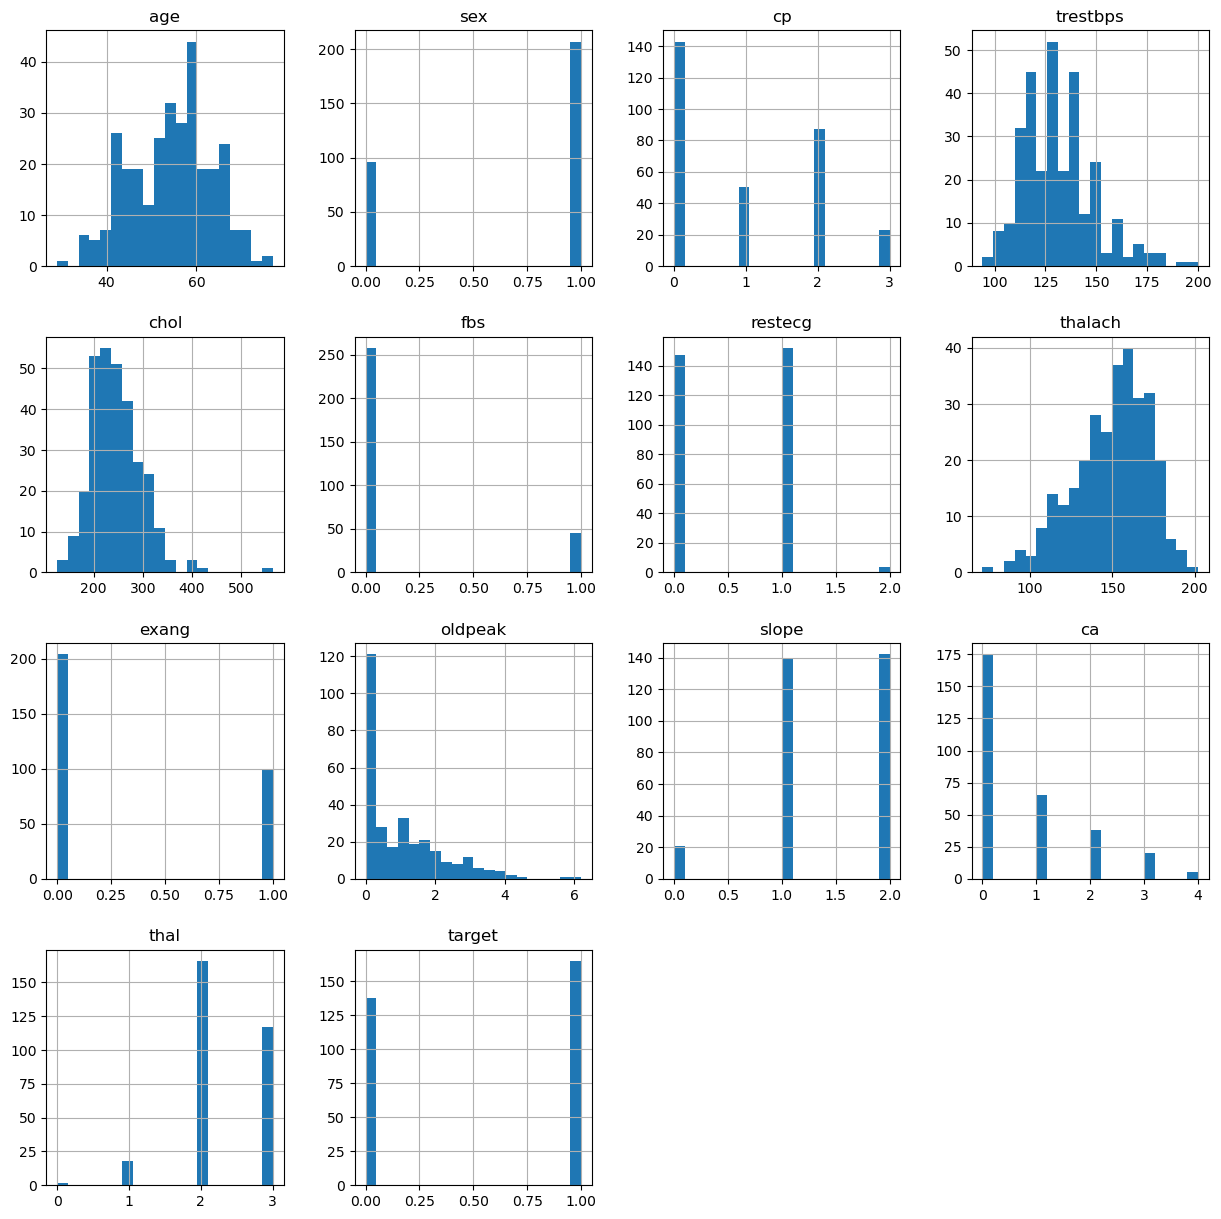

In [4]:
print(df.info())
df.describe()
# Check for missing values
df.isnull().sum()
#data visualisation 
df.hist(bins=20,figsize=(15,15))
plt.title('Histogram of the data')
plt.show()


RandomForestClassifier Accuracy: 0.8360655737704918
RandomForestClassifier Confusion Matrix:
[[24  5]
 [ 5 27]]
Logistic Regression Accuracy: 0.8524590163934426
Logistic Regression Confusion Matrix:
[[25  4]
 [ 5 27]]


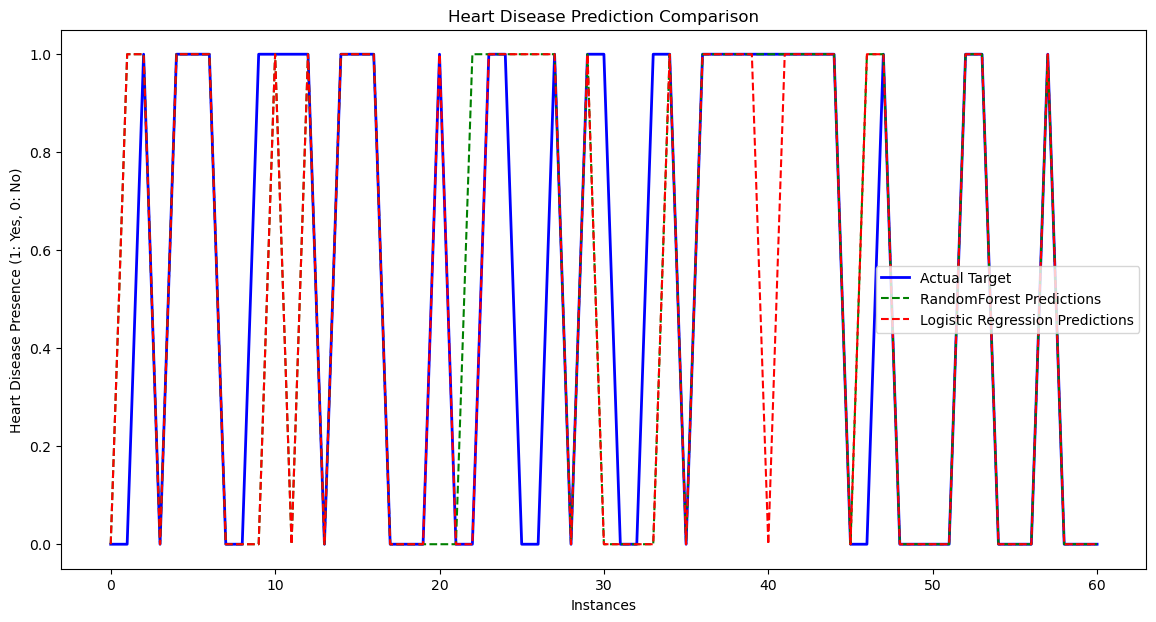

In [5]:


# Feature Selection: Use features related to heart disease prediction
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
target = 'target'  # The target variable is 'target' which indicates the presence of heart disease

# Split data into features (X) and target (y)
X = df[features]
y = df[target]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# RandomForestClassifier Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict the heart disease outcome using the RandomForestClassifier
rf_predictions = rf_model.predict(X_test_scaled)

# Evaluate RandomForestClassifier model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)

# Print RandomForestClassifier results
print(f"RandomForestClassifier Accuracy: {rf_accuracy}")
print("RandomForestClassifier Confusion Matrix:")
print(rf_conf_matrix)

# Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict the heart disease outcome using Logistic Regression
lr_predictions = lr_model.predict(X_test_scaled)

# Evaluate Logistic Regression model
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_conf_matrix = confusion_matrix(y_test, lr_predictions)

# Print Logistic Regression results
print(f"Logistic Regression Accuracy: {lr_accuracy}")
print("Logistic Regression Confusion Matrix:")
print(lr_conf_matrix)

# Visualize the results
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_test)), y_test, label='Actual Target', color='blue', linewidth=2)
plt.plot(range(len(y_test)), rf_predictions, label='RandomForest Predictions', color='green', linestyle='--')
plt.plot(range(len(y_test)), lr_predictions, label='Logistic Regression Predictions', color='red', linestyle='--')
plt.title('Heart Disease Prediction Comparison')
plt.xlabel('Instances')
plt.ylabel('Heart Disease Presence (1: Yes, 0: No)')
plt.legend()
plt.show()


In [6]:
import joblib
joblib.dump(rf_model, 'RandomForestClassifier.pkl')
loaded_random_forest_model = joblib.load('RandomForestClassifier.pkl')